In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import k3d

Galaxies are assemblies of $ N>1 $ stars in mutual gravitational attraction. One way
of studying galactic dynamics is to compute the orbit of a single star in the gravitational potential generated by the remaining $N − 1$ stars. Assume that this potential is :

$$ V(x,y,z) = A\log\left( C + \frac{x^2}{a^2} +\frac{y^2}{b^2} + \frac{z^2}{c^2} \right) $$ 

and that it rotates around the galactic axis with uniform velocity, while its functional
form does not change with time. The Lagrangian for the system rotating with
constant angular velocity $\Omega$ is : 

$$ L =\frac{1}{2}((\dot{x}-\Omega y)^2+(\dot{y}+ \Omega x)^2 + \dot{z}^2)- V(x,y,z) $$

With the coordinates $ q_1 = x, q_2 = y, q_3 = z, $ and 

$$ p_1 = \frac{\partial{L}}{\partial{\dot{y}}} = \dot{y} - \Omega y,\  p_2 = \frac{\partial{L}}{\partial{\dot{x}}} = \dot{x} + \Omega x,\ p_3 = \frac{\partial{L}}{\partial{\dot{z}}} = \dot{z} $$

we obtain the Hamiltonian $ H = p_1\dot{q_1} + p_2\dot{q_2} + p_3\dot{q_3} - L $ or 

$$ H = \frac{1}{2} (p_1^2 + p_2^2 + p_3^2) + \Omega (p_1q_2 - p_2q_1) +  A\log\left( C + \frac{q_1^2}{a^2} +\frac{q_2^2}{b^2} + \frac{q_3^2}{c^2} \right) $$

of the Hamiltion equations :

$$ \dot{q_i} = \frac{\partial{H}}{\partial{p_i}} ,\ \dot{p_i} = -\frac{\partial{H}}{\partial{q_i}} $$

for the generalized coordinates obtain : 

$$ \dot{q_1} = \frac{\partial{H}}{\partial{p_1}} = p_1 + \Omega q_2,\ \dot{q_2} = \frac{\partial{H}}{\partial{p_2}} = p_2 - \Omega q_1,\ \dot{q_3} = \frac{\partial{H}}{\partial{p_3}} = p_3$$

and for the generalized moments :

be $ \alpha = \left( C + \frac{q_1^2}{a^2} +\frac{q_2^2}{b^2} + \frac{q_3^2}{c^2} \right)$ so

$$ \dot{p_1} = -\frac{\partial{H}}{\partial{q_1}} = \Omega p_2 - \frac{A}{\alpha} \frac{2q_1}{a^2},\ \dot{p_2} = -\frac{\partial{H}}{\partial{q_2}} = - \Omega p_1 - \frac{A}{\alpha} \frac{2q_2}{b^2},\ \dot{p_3} = -\frac{\partial{H}}{\partial{q_3}} = - \frac{A}{\alpha} \frac{2q_3}{c^2}, $$

the start conditions are :

$$ q_1(0) = 2.5,\ q_2(0) = 0,\ q_3(0) = 0,\ p_1(0) = 0,\ p_3(0) = 0.2 $$.

Use parametres $ A = C = 1,\ \Omega = 0.25,\ a = 1.25,\ c = 0.75 $ and $ b = 1 $,while $p_2(0)$ is the larger of the solutions of the equation $H = 2$. Then

$$ 2 = \frac{1}{2} (p_2(0)^2 + p_3(0)^2) -  (\Omega \cdot q_1(0) p_2(0)) +  \log\left( 1 + \frac{q_1^2}{a^2}\right)  $$

$$ p_2(0) = 1.68882 $$



first we write the constants and initial conditions in type float

In [3]:
####### parametres
A = 1.
C = 1.
a = 1.25
b = 1.
c = 0.75
Ω = 0.25

###### stars condition 
q_1 = 2.5
q_2 = 0.0
q_3 = 0.0
p_1 = 0.0
p_2 = 1.68882
p_3 = 0.2

we define the function of the generalized coordinates $\dot q_i$ and moments $\dot p_i$  to solve the hamilton equations

In [5]:
def GD(y,t):# define funtion
      
        
    q1, q2, q3, p1, p2, p3 = y # vector of generalized coordinates and moments
    α = C + (q1/a)**2 + (q2/b)**2 + (q3/c)**2 
    dydt = [p1 + Ω*q2 , p2 - Ω*q1, p3, Ω*p2 - (A/α)*2*q1/a**2 , -Ω*p1 - (A/α)*2*q2/b**2, -(A/α)*2*q3/c**2]
    
    return dydt


y0 = [q_1,q_2,q_3,p_1,p_2,p_3] # vector stars condition  



to solve the hamilton equations, that is, the differential equations, we use the scipy library in python, which has the RK4 method to solve the system.

it receives as arguments the function defined above, the initial conditions and the time intervals

for information about this library :
https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [9]:
#### interval of time whit h = 0.1
t   = np.arange(0, 800000, 0.1)
sol  = odeint(GD, y0, t) # library 

In [8]:
#### interval of time whit h = 0.05

t1  = np.arange(0, 5000, 0.05)
sol1 = odeint(GD, y0, t1) # library 

In [19]:
#### interval of time whit h = 0.025

t2  = np.arange(0, 800000, 0.025)
sol2 = odeint(GD, y0, t2) # library

we make a graph in three dimensions whose coordinates $q_1,q_2,q_3$ to see the dynamics of the star

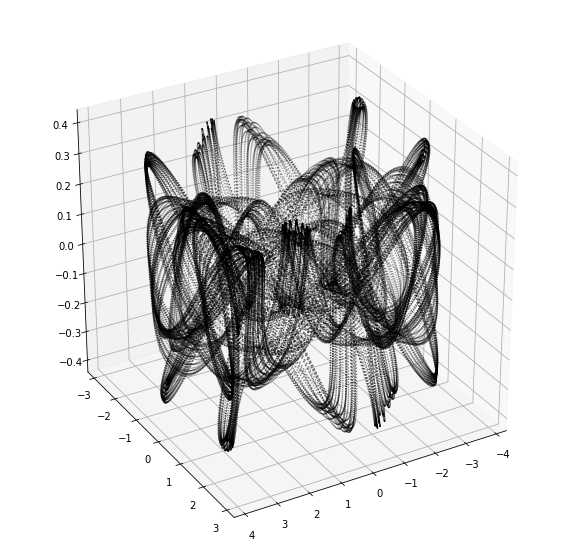

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(sol1[:,0], sol1[:,1], sol1[:,2], color='black', s = 0.1)


From the graph we can see that the movement is quite chaotic, to see this in more detail let's use a poncare section in interval $ 0 \leq t \geq 800000 $

the conditions for this section are:

$q_1>0,q_2 = 0,q_2>0$ to filter these conditions we create a pandas date frame where the solutions obtained in with odeint are stored.

for information about this library :  https://pandas.pydata.org/

In [12]:
### ### I create a dictionary of the onlyations found for t
d = {"q1":sol[:,0],"q2":sol[:,1], "q3":sol[:,2], "p1":sol[:,3], "p2":sol[:,4], "p3":sol[:,5]}

## I build a dataframe with the data obtained
df = pd.DataFrame(data = d)

###I create a new data frame with the conditions for the poncare map with h = 0.01
df_new = df[(df.q2.abs() < 0.01) & (df.q1 > 0) & (df.p2 > 0)]



we drafted the poncare section with a step de 0.1 y 0.025

(1.6, 2.6)

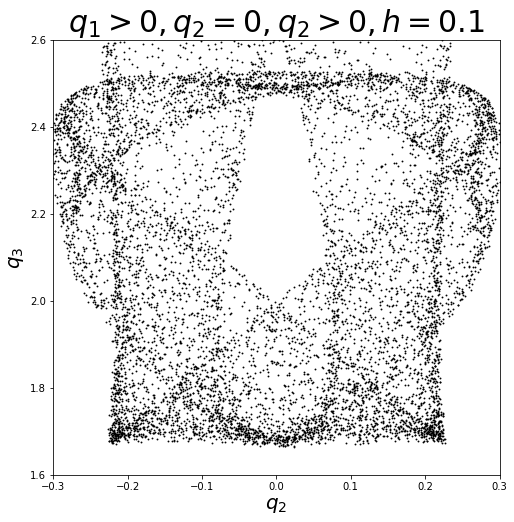

In [22]:
plt.figure(figsize = (8,8))
plt.scatter(df_new.q3, df_new.q1, s = 3, c = "k",marker='.')
plt.title(r'$q_1>0,q_2 = 0,q_2>0,h=0.1$',fontsize = 30)
plt.xlabel(r'$q_2$',fontsize = 20)
plt.ylabel(r'$q_3$',fontsize = 20)
plt.xlim([-0.3, 0.3])
plt.ylim([1.6, 2.6])

for the step de 0.025 we repeat the previous process

In [23]:
## I build a dataframe with the data obtained
df2 = pd.DataFrame({"q1_2":sol2[:,0],"q2_2":sol2[:,1], "q3_2":sol2[:,2], "p1_2":sol2[:,3], "p2_2":sol2[:,4], "p3_2":sol2[:,5]})

###I create a new data frame with the conditions for the poncare map with h = 0.025

df_new2 = df2[(df2.q2_2.abs() < 0.001) & (df2.q1_2 > 0) & (df2.p2_2 > 0)]
df_new2 = df_new2.reset_index(drop=True)

(1.6, 3.0)

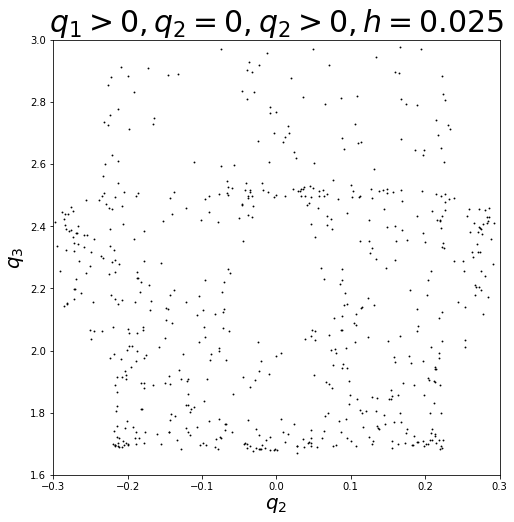

In [21]:
plt.figure(figsize = (8,8))
plt.scatter(df_new2.q3_2, df_new2.q1_2, s = 3, c = "k",marker='.')
plt.title(r'$q_1>0,q_2 = 0,q_2>0,h=0.025$',fontsize = 30)
plt.xlabel(r'$q_2$',fontsize = 20)
plt.ylabel(r'$q_3$',fontsize = 20)
plt.xlim([-0.3, 0.3])
plt.ylim([1.6, 3.0])

We can notice that for the step of 0.1 the graph is clearer despite being a larger step and both shows the chaotic system

## bibliography

* Simon Širca r Martin Horvat;*Computational Methods for Physicists*;Springer-Verlag Berlin Heidelberg 2012